In [5]:
import pandas as pd 
import matplotlib.pyplot as plt

DATA_PATH = "../data/"

In [2]:
data = pd.read_csv(f'{DATA_PATH}reddit_post.csv')
combined_data = pd.read_csv(f'{DATA_PATH}reddit_post_combined.csv')

count    5.351182e+06
mean     4.992933e+02
std      3.187403e+02
min      3.000000e+02
25%      3.370000e+02
50%      3.920000e+02
75%      5.020000e+02
max      3.000000e+03
Name: body, dtype: float64


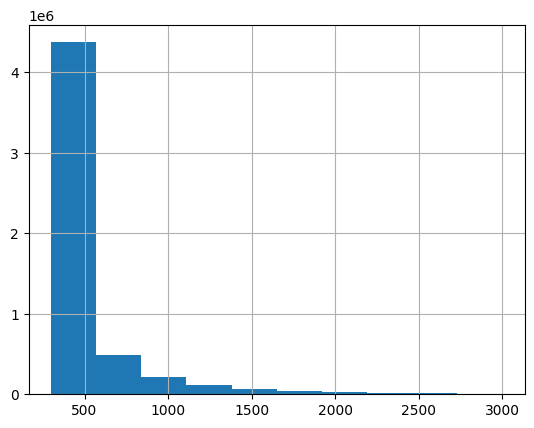

In [6]:
# plot the histogram of the length of body in combined data
combined_data['body'].str.len().hist()
print(combined_data['body'].str.len().describe())

In [29]:

# Function to concatenate body strings of each author
def concatenate_bodies(group, min_length=500):
    concatenated = ''
    for body in group['body']:
        if len(body) >= min_length:
            yield body
        else:
            if len(concatenated) > 0:
                concatenated += ' '
            concatenated += body
            if len(concatenated) >= min_length:
                yield concatenated
                concatenated = ''
    if len(concatenated) > 0:
        yield concatenated

# List to collect the new rows
new_rows = []

n = 700

# Group by 'author' and process each group
for author, group in data.groupby('author'):
    for concatenated_body in concatenate_bodies(group, n):
        new_rows.append({
            'author': author,
            'body': concatenated_body,
            'mbti': group.iloc[0]['mbti']  # assuming 'mbti' is the same for all rows of the same author
        })
        

# Create a new DataFrame from the new rows
new_df = pd.DataFrame(new_rows)
# remove the rows with less than 500 char, print them 
print(new_df[new_df['body'].str.len() < n])
new_df = new_df[new_df['body'].str.len() >= n]

                author                                               body  \
8         ---MrTONY---  was i cool? am i doing this reddit thing right...   
14           ---V0X---  i suppose ill throw my application in for expl...   
68       --treandoge--  why are we calling them car companies?  thats ...   
127         -Anunnaki-  whats a better site  in my small town i have s...   
217            -Ash21-  im really sorry that happened to you are you o...   
...                ...                                                ...   
2923407       zunscrii  nevermind its before dawn by isaac shepard you...   
2923455         zweeni  also that i guess never made it past episode 2...   
2923484        zwill99  very true many online friends of mine find it ...   
2923753        zxy_xyz  is multiplayer friends only? wondering if i ca...   
2924603          zylo_  all the good employees will leave technically ...   

         mbti  
8        ISTP  
14       INTJ  
68       ENTJ  
127      EN

1444.0


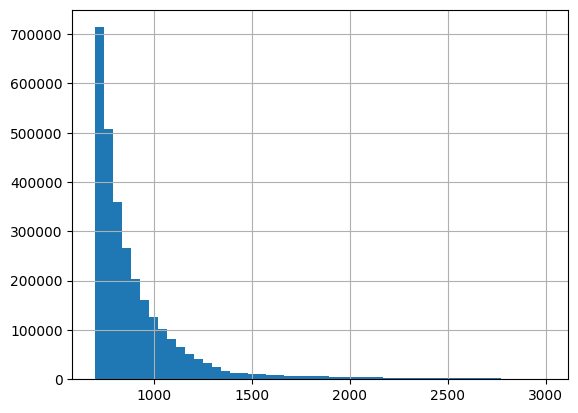

In [32]:
# plot the histogram of the length of body in new data bin=50
new_df['body'].str.len().hist(bins=50)
# find the 90th percentile of the length of body in new data
print(new_df['body'].str.len().quantile(0.9))
# remove any value that are more than 90th percentile
new_df = new_df[new_df['body'].str.len() <= new_df['body'].str.len().quantile(0.9)]

<Axes: >

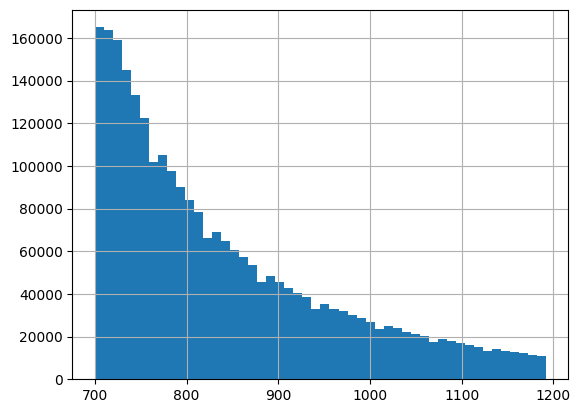

In [34]:
new_df = new_df[new_df['body'].str.len() <= new_df['body'].str.len().quantile(0.9)]
new_df['body'].str.len().hist(bins=50)


In [ ]:
# save it to a new CSV file
new_df.to_csv(f'{DATA_PATH}reddit_post_combined.csv', index=False)